In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Problem 1

In [2]:
sigma=0.1
def func1(x):  #Lorentzian
    return 1.0/(1.0+x**2)
def func2(x):
    return 1.0+np.exp(-0.5*x**2/(sigma**2))  # 1 + Gaussian

# basic variable step size integrator
def integrate_var(func,a,b,tol):
    x=np.linspace(a,b,5) # using 5-point integration
    y=func(x)
    neval=len(x) 
    f1=(y[0]+4*y[2]+y[4])/6.0*(b-a)
    f2=(y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/12.0*(b-a)
    myerr=np.abs(f2-f1)
    if (myerr<tol):
        return (16.0*f2-f1)/15.0, myerr, neval
    else:
        c=0.5*(b+a)  #middle point of the interval
        f_left, err_left, neval_left = integrate_var(func,a,c,tol/2.0)
        f_right, err_right, neval_right = integrate_var(func,c,b,tol/2.0)
        neval = neval + neval_left + neval_right
        f = f_left + f_right
        err = err_left + err_right
        return f, err, neval

# optimized integrator    
def integrate_var_new(func,a,b,tol, y_ev =[]):
    if len(y_ev) == 0:   #if this is the first time this integrator is called
        x=np.linspace(a,b,5) 
        y=func(x)
        neval=len(y) # 5 evaluations
    else:
        # the pre-evaluated points are the edges and the middle of the new interval (subinterval of the old one)
        y = np.zeros(len(y_ev)+2)   # so we should add two more points to get 5
        y[::2] = y_ev    # the even points are already known
        y[1] = func((3.*a+b)/4.0)    #evaluate the second point
        y[3] = func((a+3.*b)/4.0)     #and fourth point for the new interval
        neval = 2     # so this took 2 evaluations
    f1=(y[0]+4*y[2]+y[4])/6.0*(b-a)
    f2=(y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/12.0*(b-a)
    err = np.abs(f2-f1)
    if (err<tol):
        return (16.0*f2-f1)/15.0,err, neval
    else:
        c=0.5*(b+a)  #middle point
        f_left,err_left,neval_left = integrate_var_new(func,a,c,tol/2.0, y[:3])  # passing the first 3 points of the 5
        f_right,err_right,neval_right = integrate_var_new(func,c,b,tol/2.0, y[2:]) # passing the last 3 points of the 5 
        neval = neval + neval_left + neval_right
        f = f_left + f_right
        err = err_left + err_right
        return f,err,neval

    # just printing everything out 
print('Exp:')
f,err,neval = integrate_var(np.exp,-1,1,1e-3)
pred0 = np.exp(1)-np.exp(-1)
print(neval, ' function calls; f, err:',[f,err],' absolute error = ',(np.abs(f-pred0)))
f,err,neval = integrate_var_new(np.exp,-1,1,1e-3)
print('Optimized: ',neval ,' function calls, f, err:',[f,err],', absolute error = ',(np.abs(f-pred0)))
print('Lorentzian:')
pred1 = np.arctan(1)-np.arctan(-1)      
f,err,neval = integrate_var(func1,-1,1,1e-4)
print(neval, ' function calls, f, err:',[f,err],' absolute error = ',(np.abs(f-pred1)))
f,err,neval = integrate_var_new(func1,-1,1,1e-4)
print('Optimized: ',neval ,' function calls, f, err:',[f,err],', absolute error = ',(np.abs(f-pred1)))    
print('1+Gaussian:')
pred2=10.+np.sqrt(2*np.pi)*sigma      
f,err,neval = integrate_var(func2,-5,5,1e-4)
print(neval, ' function calls, f, err:',[f,err],' absolute error = ',(np.abs(f-pred2)))
f,err,neval = integrate_var_new(func2,-5,5,1e-4)
print('Optimized: ',neval ,' function calls, f, err:',[f,err],', absolute error = ',(np.abs(f-pred2))) 

Exp:
25  function calls; f, err: [2.350402717226764, 0.00023419190498064069]  absolute error =  3.299391613253988e-07
Optimized:  13  function calls, f, err: [2.350402717226764, 0.00023419190498064069] , absolute error =  3.299391613253988e-07
Lorentzian:
75  function calls, f, err: [1.5707963305712818, 2.357748463668874e-05]  absolute error =  3.776385204545818e-09
Optimized:  33  function calls, f, err: [1.5707963305712818, 2.357748463668874e-05] , absolute error =  3.776385204545818e-09
1+Gaussian:
335  function calls, f, err: [10.250662846829037, 3.532927117438911e-06]  absolute error =  1.936593641005402e-08
Optimized:  137  function calls, f, err: [10.250662846829037, 3.532927117438911e-06] , absolute error =  1.936593641005402e-08



We can see that we indeed save a significant number of function calls.

# Problem 2

coeffs =  [-4.56893394e-01  4.95054673e-01 -4.24689768e-02  4.85768297e-03
 -6.25084976e-04  8.57981013e-05 -1.22671891e-05  1.80404306e-06
 -2.70834248e-07  4.13047202e-08 -6.37809288e-09  9.94824874e-10
 -1.56461136e-10  2.47798691e-11 -3.94774107e-12  6.31820984e-13
 -1.01968334e-13  1.69309011e-14 -2.59381086e-15  2.77555756e-16
  1.68491867e-17]


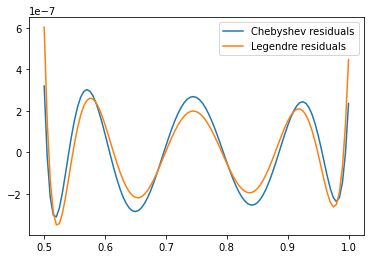

Chebyshev: max error =  3.196978294317532e-07 rms error =  1.9377246826103223e-07
Legendre: max error =  6.023577823199844e-07 rms error =  1.7989069483347603e-07


In [3]:
from numpy import polynomial

npts = 101
xx = np.linspace(0.5,1,npts) # true x values
y=np.log2(xx)
x = np.linspace(-1,1,npts)  # this array is used to map onto the interval (-1,1) where the polynomials are defined
# the relation between the x coordinate of the fit and the true x value is given by xx = (x+3.0)/4.0

order = 20

A = np.zeros([len(x),order+1])
A[:,0]=1
A[:,1]=x
for i in range(2,order+1):
    A[:,i]=2*x*A[:,i-1]-A[:,i-2]  # using a recurrence relation for the Chebyshev polynomials

u,s,v = np.linalg.svd(A,0)   #using SVD for a noiseless case
chebcoeffs = v.T@(np.diag(1/s)@(u.T@y))
print('coeffs = ', chebcoeffs)   # print out the coefficients to decide which order to use

order_use=7  # we can use 7, as the corresponding coefficient (= the upper bound of the term) is ~10**-6, and all the next are smaller  
y_cheb =A[:,:order_use+1]@chebcoeffs[:order_use+1]
legcoeffs = polynomial.legendre.legfit(x, y, order_use) # polynomial fit for comparison 
y_leg = polynomial.legendre.legval(x, legcoeffs)

plt.plot(xx,y_cheb-y, label ='Chebyshev residuals')
plt.plot(xx,y_leg-y, label = 'Legendre residuals')
plt.legend()
plt.show()
print('Chebyshev: max error = ', np.max(np.abs(y_cheb-y)), 'rms error = ', np.std(y_cheb-y))
print('Legendre: max error = ', np.max(np.abs(y_leg-y)), 'rms error = ', np.std(y_leg-y))

The Chebyshev fit has been truncated at order = 7, as the next coefficient is smaller than the desired accuracy.


As expected, the Chebyshev fit has predictable max error. The Legendre polynomial fit has a larger max error, but a smaller RMS error.

# Problem 3

This is an example of a stiff problem, so an implicit integrator should be used in order to get a stable solution.

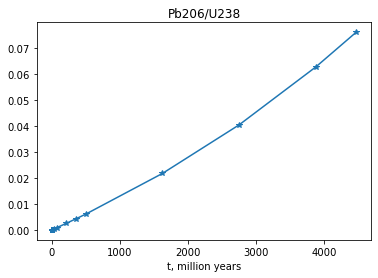

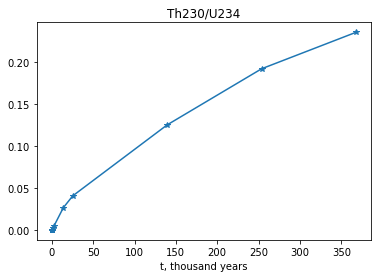

In [4]:
from scipy import integrate

# second = 1
# minute = 60
# hour = minute*60
# day = hour*24
# year = day*365

hour = 1
minute = 1./60.
second = minute/60.
day = 24
year = day*365

halflives=(4.468*10**9*year, 24.1*day, 6.7*hour, 245500*year, 75380*year, \
           1600*year, 38235*day, 3.1*minute, 26.8*minute, 19.9*minute, \
           164.3*10**(-6)*second, 22.3*year, 5.015*year, 138.376*day) 
#there are 15 elements in the chain, but the last one is stable (halflife = inf), so there are 14 halflife parameters

def f(t,y,halflives):
    dydt=np.zeros(len(halflives)+1)
    dydt[0]= -y[0]/halflives[0]     #U238 only decays
    for i in range(1, len(halflives)):
        dydt[i]= +y[i-1]/halflives[i-1]-y[i]/halflives[i]  
    dydt[-1]= +y[-2]/halflives[-2]   # Pb206 does not decay 
    return dydt*np.log(2)

y0=np.zeros(len(halflives)+1)
y0[0] = 1.  # initially there is only U238
t0=0
t1=halflives[0]  # solve during one halflife or U238
ans=integrate.solve_ivp(f,[t0,t1],y0,args = (halflives,), method='BDF')  # ‘Radau’ can be used as well

U238 = ans.y[0, :]
Pb206 = ans.y[-1, :]

U234 = ans.y[3,1:]  # skip the first point not to divide be zero
Th230 = ans.y[4,1:]

plt.plot(ans.t/24/365/10**6, Pb206/U238, '*-')
plt.title('Pb206/U238')
plt.xlabel('t, million years')
plt.show()

t2 = ans.t[ans.t<5.*halflives[4]][1:]/24/365/1000
plt.plot(t2, (Th230/U234)[:len(t2)], '*-')
plt.title('Th230/U234')
plt.xlabel('t, thousand years')
plt.show()

If we assume that U238 decays instantly to Pb206, then, solving analytically, we get the ratio for these elements = exp(t/$\tau$) - 1, so the result of numerical integration makes sense.